In [81]:
# This piece of code enables to display multiple output within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [82]:
import numpy
import pandas
import statsmodels.api as sm
co2 = sm.datasets.co2
sm.datasets.co2.load_pandas().data

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


In [83]:
dataset_co2 = co2.load_pandas()
df_co2 = dataset_co2.data

In [84]:
#Computes number of missing values
df_co2.isnull().sum()[df_co2.isnull().sum()>0].sort_values(ascending=False)
df_co2.isnull().sum()[df_co2.isnull().sum()>0].sort_values(ascending=False)/df_co2.shape[0]

co2    59
dtype: int64

co2    0.025832
dtype: float64

In [85]:
import statistics
print("What is the mean of the entire atmospheric CO2 concentrations: ")
df_co2['co2'].mean()

What is the mean of the entire atmospheric CO2 concentrations: 


340.1422471910109

In [86]:
print("What is the median of the entire atmospheric CO2 concentrations: ")
df_co2['co2'].median()

What is the median of the entire atmospheric CO2 concentrations: 


338.3

In [65]:
print("What is the mode of the entire atmospheric CO2 concentrations: ")
df_co2['co2'].mode()

What is the mode of the entire atmospheric CO2 concentrations: 


0    323.1
dtype: float64

In [66]:
#Exercise: [Python] Visualization and Descriptive Statistics

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

,co2
1950,315.739726
1960,320.215369
1970,330.848560
1980,345.279304
1990,360.384069
2000,370.102857


,co2
1950,1.574779
1960,3.040849
1970,4.029158
1980,5.003191
1990,4.994624
2000,1.977735


Text(0.5, 1.0, 'The amount of variation for CO2 concentration over the decades')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Std Dev. of CO2 concentrations')

This plot shows that the CO2 concentrations are more spread out over a wider range each decade until 2000


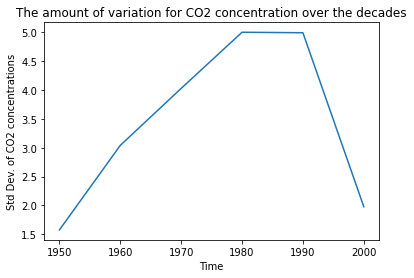

In [71]:
co2_decade = df_co2.groupby(df_co2.index.year // 10 * 10).mean()
co2_decade

co2_decade2 = df_co2.groupby(df_co2.index.year // 10 * 10).std()
co2_decade2

plt.plot(co2_decade2)
plt.title("The amount of variation for CO2 concentration over the decades")
plt.xlabel("Time")
plt.ylabel("Std Dev. of CO2 concentrations")
print("This plot shows that the CO2 concentrations are more spread out over a wider range each decade until 2000")

In [11]:
co2_decade.shape
df_co2.shape

(6, 1)

(2284, 1)

In [ ]:
co2_decade3 = df_co2.groupby(df_co2.index.year // 10 * 10).max()
co2_decade3

plt.plot(co2_decade3)
plt.title("The highest CO2 concentration over the decades")
plt.xlabel("Time")
plt.ylabel("Max CO2 concentrations")
print("This plot shows the CO2 concentrations hits new highs each decade")

**The time series below shows that co2 concentrations has been increasing each year due to the burning of fossil fuels**

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2284 entries, 1958-03-29 to 2001-12-29
Freq: W-SAT
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   co2           2225 non-null   float64       
 1   recordeddate  2284 non-null   datetime64[ns]
 2   recordedyear  2284 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 71.4 KB


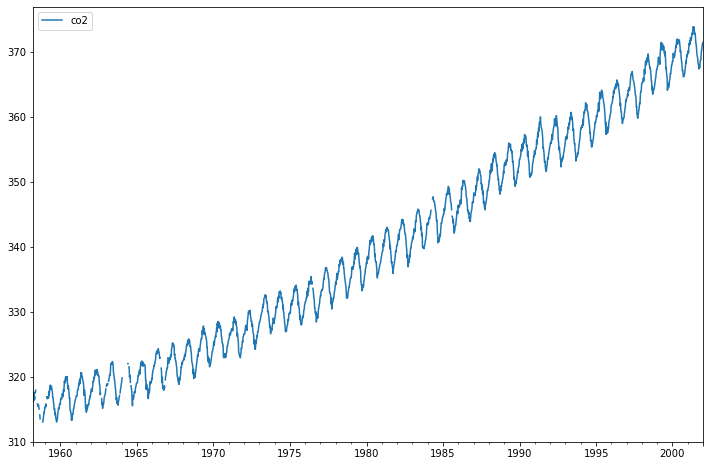

In [97]:
#Exercise: [Python] Data Analysis I 

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
printmd('**The time series below shows that co2 concentrations has been increasing each year due to the burning of fossil fuels**')

# Computes missing values and drops them

df_co2.shape
df_co2.isnull().sum()[df_co2.isnull().sum()>0].sort_values(ascending=False)
df_co2.dropna()

df_co2_nomiss = df_co2.dropna()
df_co2_nomiss.shape

# Plots timeseries of co2
df_co2_ts = df_co2
df_co2_ts.info()
df_co2_ts.head()
df_co2_ts.tail()

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
df_co2_ts.co2.plot(ax=ax);
legend = ax.legend(loc = 'upper left');
legend.prop.set_size(20);

**The decompostion plots below show that there is an obvious trend increase over time but no seasonal patterns or residuals.**

,co2,recordeddate,recordedyear
1958-03-29,316.1,1958-03-29,1958
1958-04-05,317.3,1958-04-05,1958
1958-04-12,317.6,1958-04-12,1958
1958-04-19,317.5,1958-04-19,1958
1958-04-26,316.4,1958-04-26,1958


1958-03-29    316.1
1958-04-05    317.3
1958-04-12    317.6
1958-04-19    317.5
1958-04-26    316.4
              ...  
2001-12-01    370.3
2001-12-08    370.8
2001-12-15    371.2
2001-12-22    371.3
2001-12-29    371.5
Name: trend, Length: 2225, dtype: float64
1958-03-29    0.0
1958-04-05    0.0
1958-04-12    0.0
1958-04-19    0.0
1958-04-26    0.0
             ... 
2001-12-01    0.0
2001-12-08    0.0
2001-12-15    0.0
2001-12-22    0.0
2001-12-29    0.0
Name: seasonal, Length: 2225, dtype: float64
1958-03-29    0.0
1958-04-05    0.0
1958-04-12    0.0
1958-04-19    0.0
1958-04-26    0.0
             ... 
2001-12-01    0.0
2001-12-08    0.0
2001-12-15    0.0
2001-12-22    0.0
2001-12-29    0.0
Name: resid, Length: 2225, dtype: float64
1958-03-29    316.1
1958-04-05    317.3
1958-04-12    317.6
1958-04-19    317.5
1958-04-26    316.4
              ...  
2001-12-01    370.3
2001-12-08    370.8
2001-12-15    371.2
2001-12-22    371.3
2001-12-29    371.5
Name: co2, Length: 2225, dtype: flo

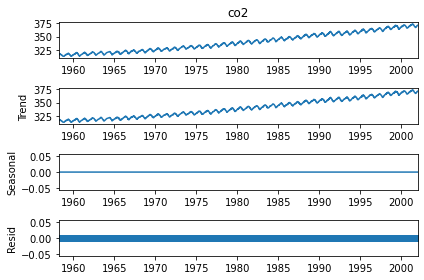

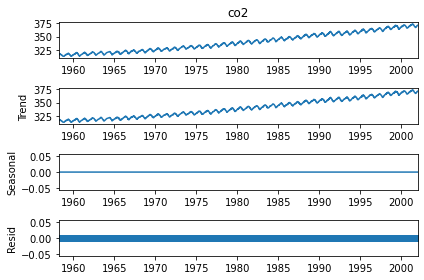

In [96]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

def printmd(string):
    display(Markdown(string))
printmd('**The decompostion plots below show that there is a trend increase over time but no seasonal patterns or residuals.**')

# Sets values by year
df_co2['recordeddate'] = df_co2.index
df_co2['recordedyear']=df_co2['recordeddate'].dt.year
df_co2.head()
df_byyear = df_co2.groupby(['recordedyear'])['co2'].mean()

# Creates decomposition plots
series = df_co2_nomiss['co2']
result = seasonal_decompose(series, model='additive', period = 1)
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

result.plot()
pyplot.show()